# 決定木

In [1]:
%matplotlib inline
from sklearn.utils import shuffle
from sklearn.datasets import fetch_mldata
from sklearn.metrics import f1_score
from sklearn.cross_validation import train_test_split
from sklearn import tree
import numpy as np
import matplotlib.pyplot as plt

In [2]:
mnist = fetch_mldata('MNIST original')
mnist_X, mnist_y = shuffle(mnist.data.astype('float32'),
                           mnist.target.astype('int32'), random_state=42)
mnist_X = mnist_X / 255.0
train_X, test_X, train_y, test_y = train_test_split(mnist_X, mnist_y,
                                                    test_size=0.2,
                                                    random_state=43)

## scikit-learnの分類器を使用

In [3]:
clf = tree.DecisionTreeClassifier(max_depth=10)
clf = clf.fit(train_X, train_y)

In [4]:
pred_y = clf.predict(test_X)
f1_score(test_y[:len(pred_y)], pred_y, average='macro')

0.85267443278552579

## 決定木の可視化

In [7]:
with open('graph.dot', 'w') as f:
    f = tree.export_graphviz(clf, out_file=f)
    ### WRITEME

## 応用
* 木の深さを変えてみて、挙動を調べる。

In [6]:
range_array = list(range(3,20))
score_array = []

for i in range_array:
    clf = tree.DecisionTreeClassifier(max_depth=i)
    clf = clf.fit(train_X, train_y)
    pred_y = clf.predict(test_X)
    score = f1_score(test_y[:len(pred_y)], pred_y, average='macro')
    score_array.append(score)

/Users/arakawariku/.pyenv/versions/miniconda3-3.19.0/envs/ml_env/lib/python3.5/site-packages/sklearn/metrics/classification.py:1074: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


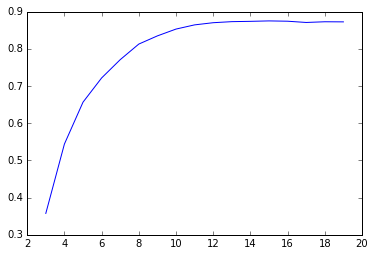

In [8]:
plt.plot(range_array, score_array)